# Tutorial 5

This is my attempt at doing tutorial 5, which will cover SVM

# Libraries

In [1]:
import matplotlib.pyplot as plt

from sklearn.svm import SVC

# Extra content

In [2]:
""" Note: this cell was given by Dr Huthwaite. In principle it is easy to replicate
this, but for the sake of time and given that the purpose of the tutorial is not 
this, it was decided to just copy it."""

import numpy as np


def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar


def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_xor_distribution(n=100):
    a = np.round(n / 4).astype('int')
    b = n-a*3
    xc1 = np.concatenate([np.random.multivariate_normal([-2.3, -2.3], get_cov(0.4, 0.1, -45), a),
                          np.random.multivariate_normal([2.3, 2.3], get_cov(0.4, 0.1, -45), a)])
    xc2 = np.concatenate([np.random.multivariate_normal([-2.3, 2.3], get_cov(0.4, 0.1, 45), a),
                          np.random.multivariate_normal([2.3, -2.3], get_cov(0.4, 0.1, 45), b)])
    xc = np.array(np.concatenate([xc1, xc2]))

    y = np.array(np.concatenate([np.zeros([2 * a, 1]), np.ones([a+b, 1])])).squeeze()
    X = xc
    return X, y


In [21]:
X,y = gen_xor_distribution(n= 400)
y[y==0] = -1

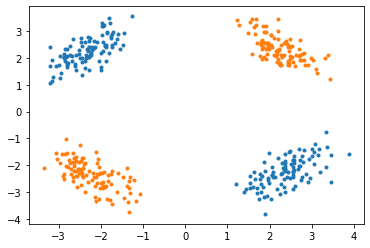

In [22]:
plt.plot(X[y==1,0], X[y==1,1], '.')
plt.plot(X[y==-1,0], X[y==-1,1],'.')

In [26]:
svm = SVC(C = 0.1, gamma = 'scale', kernel='rbf')

In [27]:
svm.fit(X,y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

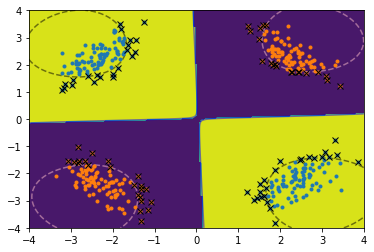

In [28]:
x1 = np.linspace(-4,4,200)
x2 = np.linspace(-4,4,200)
x1_grid, x2_grid = np.meshgrid(x1,x2)
Xgrid = np.array([x1_grid, x2_grid]).reshape(2, 40000)

yhat = svm.predict(Xgrid.T)
yhat = yhat.reshape(-200,200)

fig, ax = plt.subplots()
ax.contourf(x1, x2, yhat) # not sure what this is actually showing
# need to understand this better!

""" I think that this first one draws the separation between the two classes with
no margins applied. So this is the 'purest' form of the SVM? Not sure... """
ax.plot(X[y==1,0], X[y==1,1], '.')
ax.plot(X[y==-1,0], X[y==-1,1],'.')

Z = np.reshape(svm.decision_function(Xgrid.T), [200, 200])

ax.contour(x1 , x2 , Z, colors=['pink','blue','black'], levels=[-1, 0, 1],
alpha=0.5, linestyles=['--', '-', '--'])

""" The dashed lines are actually the decision boundaries. So after the margin has been
applied."""
# need to understand what 'contour' is doing?

#plt.plot(X[y==1,0], X[y==1,1], '.')
#plt.plot(X[y==-1,0], X[y==-1,1],'.')
sv = svm.support_vectors_
sv
ax.plot(sv[:,0], sv[:,1],'x', c='#000000')

# Performance validation

Note: I skipped over the radial section because I will deal with this in the extension

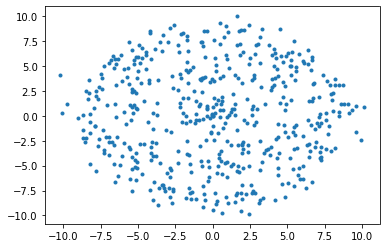

In [31]:
X,y = gen_circular_distribution(500, scale = 1)
plt.plot(X[:,0],X[:,1],'.')

In [33]:
svm = SVC(C = 0.1, gamma = 'auto', kernel='rbf')

In [34]:
from sklearn.model_selection import KFold

In [35]:
kf = KFold( n_splits=5, shuffle=True)

In [42]:
score_test = []
score_train = []
for train_index , test_index in kf.split (X):
    X_train = X[ train_index ]
    y_train = y[train_index]
    X_test = X[ test_index ]
    y_test = y [ test_index ]
    svm.fit(X_train,y_train)
    yhat = svm.predict(X_test)
    
    score_test.append((yhat == y_test).sum()/len(y_test))
    
    yhat = svm.predict(X_train)
    
    score_train.append((yhat == y_train).sum()/len(y_train))

print(score_test)
print(score_train)

    

[0.68, 0.79, 0.81, 0.64, 0.77]
[0.745, 0.73, 0.78, 0.755, 0.77]
